<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

from sklearn.model_selection import KFold

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
means = wine_data[wine_data.columns[:-1]].mean()
stds = wine_data[wine_data.columns[:-1]].std()
wine_data[wine_data.columns[:-1]] = (wine_data[wine_data.columns[:-1]] - means) / stds

f = lambda x: 1 if x > 5 else 0
for i in xrange(len(wine_data)):
    wine_data.set_value(i, 'quality', f(wine_data['quality'][i]))

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,0
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,0
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,1
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


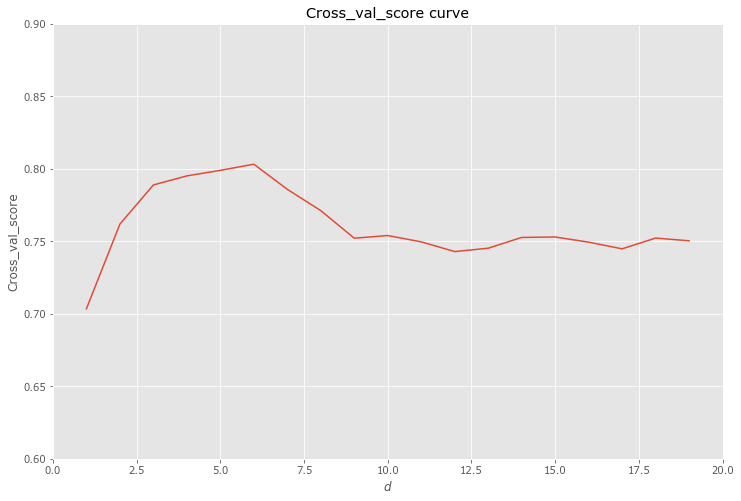

In [7]:
X = np.array(wine_data[wine_data.columns[:-1]])
y = np.array(wine_data['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

max_depths = range(1,20)
scores = []
for i in max_depths:
    clf = DecisionTreeClassifier(max_depth=i)
    scores.append(cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=10).mean())

plt.figure()
plt.title('Cross_val_score curve')
plt.xlabel("$d$")
plt.ylabel("Cross_val_score")
plt.plot(max_depths, scores)
plt.axis([0, 20, 0.6, 0.9])
plt.show()

Optimum d = 5

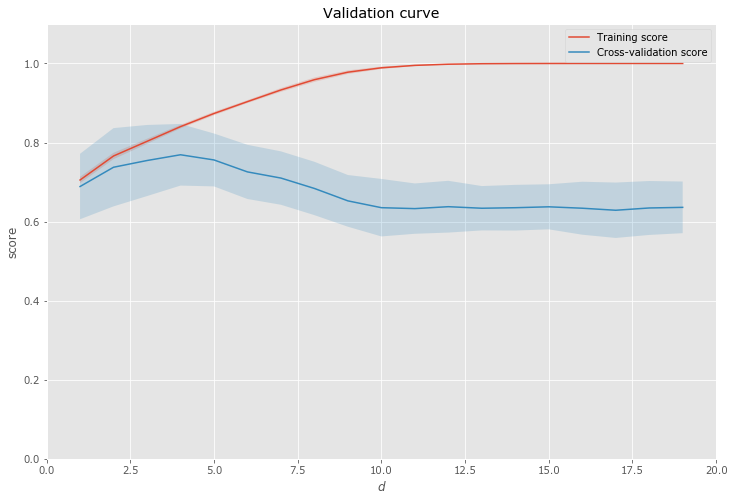

In [12]:
max_depths = range(1,20)
clf = DecisionTreeClassifier()
train_scores, test_scores = validation_curve(
    clf, X, y, param_name="max_depth", param_range=max_depths,
    cv=10, scoring='roc_auc')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation curve')
plt.xlabel("$d$")
plt.ylabel("score")
plt.plot(max_depths, train_scores_mean, label="Training score")
plt.fill_between(max_depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.2)
plt.plot(max_depths, test_scores_mean, label="Cross-validation score")
plt.fill_between(max_depths, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha = 0.2,)
plt.axis([0, 20, 0, 1.1])
plt.legend(loc="best")
plt.show()

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [13]:
features_dict = {}
n_features = len(wine_data.columns[:-1])
for i in xrange(n_features):
    features_dict.update({wine_data.columns[:-1][i] : clf.feature_importances_[i]}) 
features = sorted(features_dict.items(), key=lambda x: x[1])[::-1]
for idx, e in enumerate(features):
    print idx, e[0], e[1]

0 alcohol 0.26083112839
1 sulphates 0.125478059506
2 total sulfur dioxide 0.103213341082
3 fixed acidity 0.0749817023544
4 density 0.0744186960667
5 volatile acidity 0.0736951183395
6 chlorides 0.0731186023611
7 pH 0.0618089085747
8 residual sugar 0.0557253896942
9 free sulfur dioxide 0.0511227534146
10 citric acid 0.045606300216


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

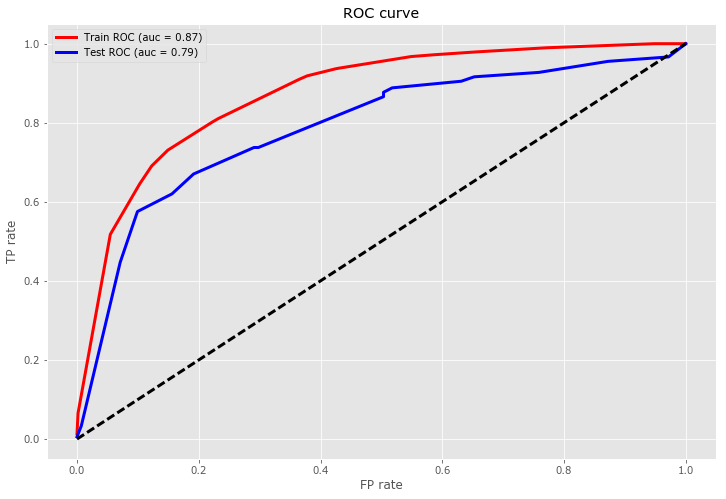

In [60]:
optimum_depth = 5
clf = DecisionTreeClassifier(max_depth=optimum_depth)
clf.fit(X_train, y_train)

y_score_train = clf.predict_proba(X_train)[:,1]
y_score_test = clf.predict_proba(X_test)[:,1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, c='red', lw=3, label='Train ROC (auc = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='blue',lw=3, label='Test ROC (auc = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, jaccard_similarity_score, precision_score, recall_score, roc_auc_score  
threshold = 0.5
y_score_threshold = (y_score_test >= threshold).astype(int)

print 'accuracy_score: ', accuracy_score(y_test, y_score_threshold)
print 'average_precision_score: ', average_precision_score(y_test, y_score_threshold)
print 'f1_score: ', f1_score(y_test, y_score_threshold)
print 'jaccard_similarity_score: ', jaccard_similarity_score(y_test, y_score_threshold)
print 'precision_score: ', precision_score(y_test, y_score_threshold)
print 'recall_score: ', recall_score(y_test, y_score_threshold)
print 'roc_auc_score: ', roc_auc_score(y_test, y_score_threshold)

accuracy_score:  0.721875
average_precision_score:  0.821462928626
f1_score:  0.747875354108
jaccard_similarity_score:  0.721875
precision_score:  0.758620689655
recall_score:  0.737430167598
roc_auc_score:  0.719778913586


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
optimum_depth = 5
n_trees = range(10,101,10)
tree = DecisionTreeClassifier(max_depth=optimum_depth, random_state=1)
bagging = BaggingClassifier(base_estimator=tree, random_state=1)
forest = RandomForestClassifier(max_depth=optimum_depth, random_state=1)

bagging_train, bagging_test = validation_curve(bagging, X_train, y_train, 'n_estimators', trees, scoring='roc_auc', cv=10)
forest_train, forest_test = validation_curve(forest, X_train, y_train, 'n_estimators', trees, scoring='roc_auc', cv=10)

bagging_train_mean = np.mean(bagging_train, axis=1)
bagging_train_std = np.std(bagging_train, axis=1)
bagging_test_mean = np.mean(bagging_test, axis=1)
bagging_test_std = np.std(bagging_test, axis=1)

forest_train_mean = np.mean(forest_train, axis=1)
forest_train_std = np.std(forest_train, axis=1)
forest_test_mean = np.mean(forest_test, axis=1)
forest_test_std = np.std(forest_test, axis=1)

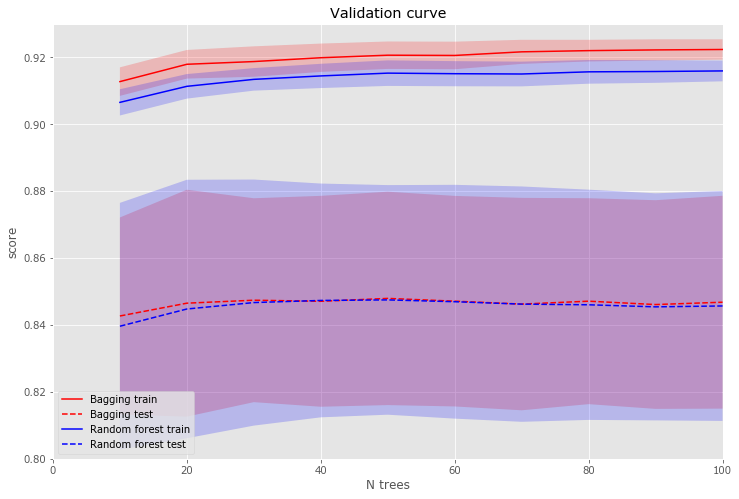

In [88]:
plt.figure()
plt.title('Validation curve')
plt.xlabel("N trees")
plt.ylabel("score")

plt.plot(n_trees, bagging_train_mean, label="Bagging train", c='red')
plt.fill_between(n_trees, bagging_train_mean - bagging_train_std, bagging_train_mean + bagging_train_std, alpha = 0.2, facecolor='red')
plt.plot(n_trees, bagging_test_mean, label="Bagging test", c='red', linestyle='--')
plt.fill_between(n_trees, bagging_test_mean - bagging_test_std, bagging_test_mean + bagging_test_std, alpha = 0.2, facecolor='red')

plt.plot(n_trees, forest_train_mean, label="Random forest train", c='blue')
plt.fill_between(n_trees, forest_train_mean - forest_train_std, forest_train_mean + forest_train_std, alpha = 0.2, facecolor='blue')
plt.plot(n_trees, forest_test_mean, label="Random forest test", c='blue', linestyle='--')
plt.fill_between(n_trees, forest_test_mean - forest_test_std, forest_test_mean + forest_test_std, alpha = 0.2, facecolor='blue')
plt.axis([0, 100, 0.8, 0.93])
plt.legend(loc="best")
plt.show()

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [91]:
from sklearn.model_selection import GridSearchCV

max_depths = range(1,20)
n_trees = range(10,101,10)
forest = RandomForestClassifier(random_state=1)
grid = {'n_estimators': n_trees, 'max_depth': max_depths}
grid_cv = GridSearchCV(forest, grid, 'roc_auc', cv=10)
grid_cv.fit(X_train, y_train)
print grid_cv.best_params_

{'n_estimators': 100, 'max_depth': 15}


In [96]:
forest_optimum = grid_cv.best_estimator_
y_score = forest_optimum.predict_proba(X_test)[:,1]
print 'Quality in control sample: ', roc_auc_score(y_test, y_score)

print 'Cross_val_score: ', cross_val_score(forest_optimum, X, y, scoring='roc_auc', cv=10).mean()


Quality in control sample:  0.904136455486
Cross_val_score:  0.803537219162
